## Transfer Learning Xception using Keras

Please download the dataset from the below url

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate


In [6]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122400 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.9 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=63c70bea2cd1f46e545738ca51656c10ed92b6bc97046500a48dd55f18460a03
  Stored in directory: /root/.cache/pip/wheels/c9/a5/cc/cb20f1314d4cdec0001fd72baa1efe93e1542a81bdea2fc639
Successfully built libarchive


In [7]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [12]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




83683744/83683744 [==============================] - 5s 0us/step


In [13]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [14]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [15]:
len(folders)

0

In [16]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [17]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [18]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-23-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 737s 12s/step - loss: 1.2945 - accuracy: 0.7781 - val_loss: 0.1167 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 40s 663ms/step - loss: 0.5481 - accuracy: 0.8949 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 41s 664ms/step - loss: 0.4839 - accuracy: 0.9154 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 41s 669ms/step - loss: 0.3390 - accuracy: 0.9334 - val_loss: 0.0424 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 41s 671ms/step - loss: 0.3728 - accuracy: 0.9277 - val_loss: 0.3755 - val_accuracy: 0.8333
Epoch 6/20
61/61 [==============================] - 41s 672ms/step - loss: 0.4059 - accuracy: 0.9349 - val_loss: 0.4254 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 41s 669ms/step - loss: 0.3861 - accuracy: 0.9293 - val_loss: 0.1200 - val_accuracy: 0.8889


In [24]:
import matplotlib.pyplot as plt

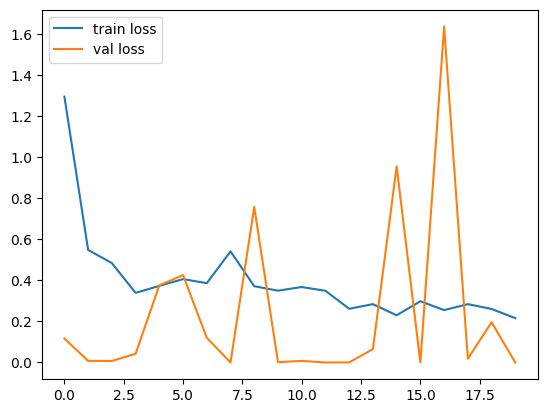

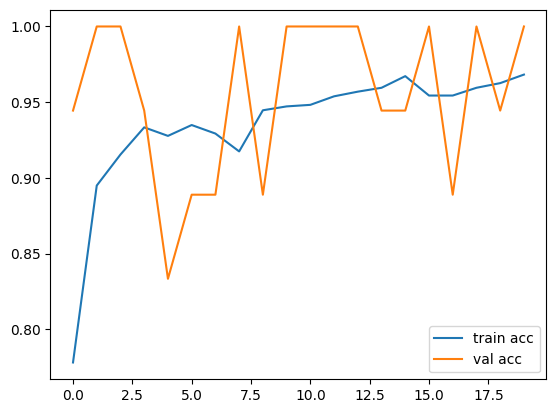

<Figure size 640x480 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_xception.h5')

In [27]:

y_pred = model.predict(test_set)


1/1 [==============================] - 4s 4s/step


In [28]:
y_pred

array([[9.6454897e-31, 1.0000000e+00, 1.2748077e-20, 1.5557724e-20],
       [3.9259034e-21, 1.0000000e+00, 1.0403653e-26, 1.6097375e-21],
       [3.9038039e-20, 1.7321713e-19, 3.0251014e-05, 9.9996972e-01],
       [9.1774422e-20, 1.0000000e+00, 7.8637507e-22, 6.1960788e-09],
       [1.6763506e-18, 4.8162901e-27, 1.0000000e+00, 5.2666957e-31],
       [2.9175457e-24, 3.5000253e-21, 1.0000000e+00, 3.0110751e-33],
       [0.0000000e+00, 1.9393069e-30, 0.0000000e+00, 1.0000000e+00],
       [3.4047485e-13, 4.4733908e-10, 1.3305186e-14, 1.0000000e+00],
       [1.0000000e+00, 3.0469957e-20, 8.0551767e-23, 3.9642756e-15],
       [5.1623597e-26, 1.0000000e+00, 7.8790773e-19, 3.3716637e-19],
       [1.0000000e+00, 0.0000000e+00, 7.9287194e-38, 0.0000000e+00],
       [4.4576995e-11, 1.0000000e+00, 1.4961789e-18, 1.2464367e-12],
       [2.3373600e-22, 3.3658988e-31, 1.0000000e+00, 1.4527530e-27],
       [7.1270703e-25, 6.7947542e-19, 1.0000000e+00, 1.2297633e-22],
       [2.2280355e-16, 1.0559288e-

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([1, 1, 3, 1, 2, 2, 3, 3, 0, 1, 0, 1, 2, 2, 2, 3, 3, 0])

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('model_xception.h5')

In [34]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'